Sales Predictions Project 1 - Part 1
----
Luke Dibble

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = "/content/sales_predictions.csv"

sales_df = pd.read_csv(filename)
sales_df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [236]:
sales_df = sales_df.drop(columns= 'Outlet_Establishment_Year')
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           7060 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           6113 non-null   object 
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(7)
memory usage: 732.6+ KB


In [237]:
sales_df.duplicated().any()

False

In [238]:
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [239]:
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace(['LF'],'Low Fat')
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace(['low fat'],'Low Fat')
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace(['reg'],'Regular')
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [240]:
sales_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [241]:
sales_df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
DRN47     9
FDX20     9
NCB18     9
         ..
DRF48     1
FDN52     1
FDT35     1
FDK57     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [242]:
sales_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [243]:
sales_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [244]:
#Create filters
outlet10 = sales_df['Outlet_Identifier'] == 'OUT010'
outlet13 = sales_df['Outlet_Identifier'] == 'OUT013'
outlet17 = sales_df['Outlet_Identifier'] == 'OUT017'
outlet18 = sales_df['Outlet_Identifier'] == 'OUT018'
outlet19 = sales_df['Outlet_Identifier'] == 'OUT019'
outlet27 = sales_df['Outlet_Identifier'] == 'OUT027'
outlet35 = sales_df['Outlet_Identifier'] == 'OUT035'
outlet45 = sales_df['Outlet_Identifier'] == 'OUT045'
outlet46 = sales_df['Outlet_Identifier'] == 'OUT046'
outlet49 = sales_df['Outlet_Identifier'] == 'OUT049'
sales_df[outlet49].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
10,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,Medium,Tier 1,Supermarket Type1,1516.0266
12,FDX32,15.1,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,Medium,Tier 1,Supermarket Type1,1589.2646
17,FDP49,9.0,Regular,0.069196,Breakfast,54.3614,OUT049,Medium,Tier 1,Supermarket Type1,718.3982


OUT010, OUT017, OUT045 - No Outlet Identifiers

OUT019, OUT027 - No Item Weight



In [245]:
sales_df.isnull().sum()

Item_Identifier            0
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

In [246]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent', add_indicator = True)
sales_df['Outlet_Size'] = imputer.fit_transform(sales_df['Outlet_Size'].values.reshape(-1,1))[:,0]

In [247]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean', add_indicator = True)
sales_df['Item_Weight'] = imputer.fit_transform(sales_df['Item_Weight'].values.reshape(-1,1))[:,0]
sales_df.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [248]:
#Which Outlet has the most in sales
sales_df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum()

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,1.883402e+05
OUT013,2.142664e+06
OUT017,2.167465e+06
OUT018,1.851823e+06
OUT019,1.796941e+05
OUT027,3.453926e+06
OUT035,2.268123e+06
OUT045,2.036725e+06
OUT046,2.118395e+06


In [249]:
#Item countby store
sales_df.groupby(['Outlet_Identifier'])[['Item_Identifier']].count()

,Item_Identifier
Outlet_Identifier,
OUT010,555
OUT013,932
OUT017,926
OUT018,928
OUT019,528
OUT027,935
OUT035,930
OUT045,929
OUT046,930


In [250]:
#Fat content in items by store
sales_df.groupby(['Outlet_Identifier','Item_Fat_Content',])[['Item_Identifier']].count()

Item_Identifier
Outlet_Identifier Item_Fat_Content                 
OUT010            Low Fat                       359
                  Regular                       196
OUT013            Low Fat                       606
                  Regular                       326
OUT017            Low Fat                       594
                  Regular                       332
OUT018            Low Fat                       598
                  Regular                       330
OUT019            Low Fat                       346
                  Regular                       182
OUT027            Low Fat                       605
                  Regular                       330
OUT035            Low Fat                       606
                  Regular                       324
OUT045            Low Fat                       609
                  Regular                       320
OUT046            Low Fat                       598
                  Regular                       332
OUT049            Low Fat                       596
                  Regular                       334

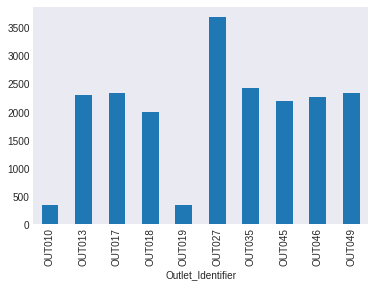

In [251]:
#Avg sales based on outlet

sales_df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].mean().plot(kind = 'bar', legend = False);

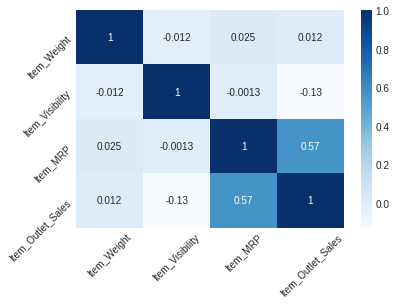

In [252]:
corr = sales_df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45);

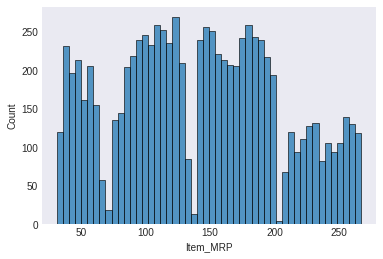

In [253]:
sns.histplot(data=sales_df['Item_MRP'], bins = 50);

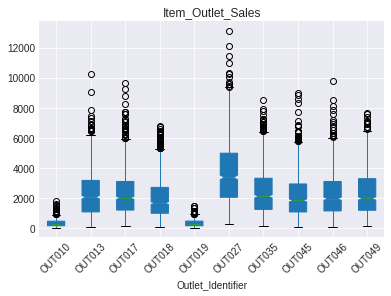

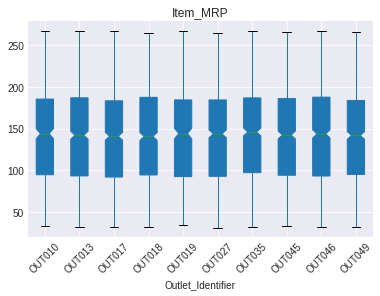

In [254]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

sales_df.boxplot(column = ['Item_Outlet_Sales'], by='Outlet_Identifier', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45)

sales_df.boxplot(column = ['Item_MRP'], by='Outlet_Identifier', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

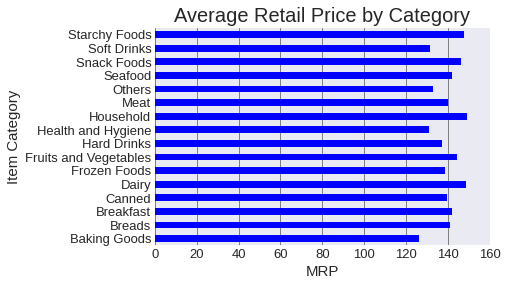

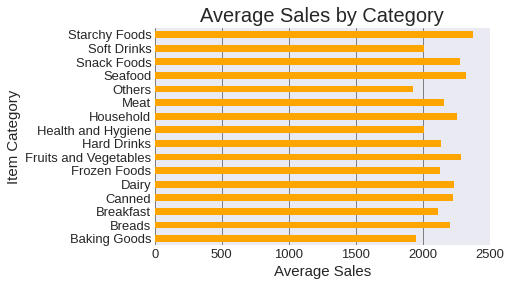

In [255]:
plt.style.use('seaborn-dark')
colors = ['Blue', 'Orange']

sales_df.groupby(['Item_Type'])[['Item_MRP']].mean().plot(kind = "barh", legend = False, color = 'blue')
plt.grid(axis = 'x', c = 'grey', linewidth = 1)
plt.title('Average Retail Price by Category', fontsize = 20)
plt.ylabel('Item Category', fontsize = 15)
plt.xlabel('MRP', fontsize = 15)
plt.xlim(0,160)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13);

sales_df.groupby(['Item_Type'])[['Item_Outlet_Sales']].mean().plot(kind = 'barh', legend = False, color = 'orange')
plt.grid(axis = 'x', c = 'grey', linewidth = 1)
plt.title('Average Sales by Category', fontsize = 20)
plt.ylabel('Item Category', fontsize = 15)
plt.xlabel('Average Sales', fontsize = 15)
plt.xlim(0,2500)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13);

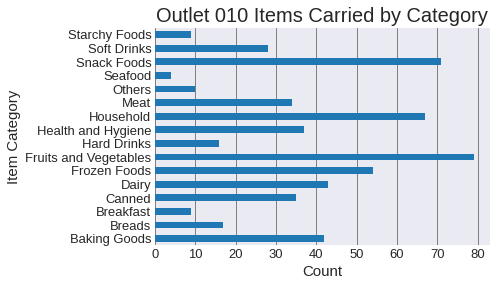

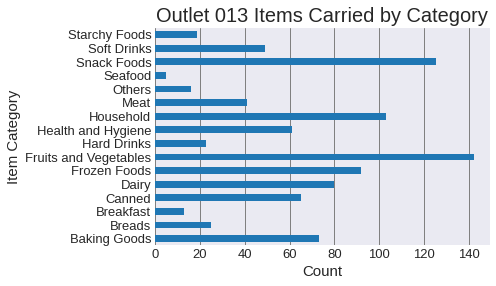

In [256]:
plt.style.use('seaborn-dark')

sales_df[outlet10].groupby(['Item_Type'])[['Item_MRP']].count().plot(kind = "barh", legend = False)
plt.grid(axis = 'x', c = 'grey', linewidth = 1)
plt.title('Outlet 010 Items Carried by Category', fontsize = 20)
plt.ylabel('Item Category', fontsize = 15)
plt.xlabel('Count', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13);

sales_df[outlet13].groupby(['Item_Type'])[['Item_MRP']].count().plot(kind = "barh", legend = False)
plt.grid(axis = 'x', c = 'grey', linewidth = 1)
plt.title('Outlet 013 Items Carried by Category', fontsize = 20)
plt.ylabel('Item Category', fontsize = 15)
plt.xlabel('Count', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13);

#repeatable for all 10 Outlets

In [257]:
size = {'Small': 0, 'Medium': 1, 'High':2}
sales_df['Outlet_Size'] = sales_df['Outlet_Size'].map(size)
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,2,Tier 3,Supermarket Type1,994.7052


In [258]:
df = pd.get_dummies(sales_df, prefix="", prefix_sep= "", columns= ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type','Item_Type'], drop_first= True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Item_Outlet_Sales,Regular,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,FDA15,9.30,0.016047,249.8092,OUT049,1,3735.1380,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,1,443.4228,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1,2097.2700,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1,732.3800,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,2,994.7052,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [259]:
df = df.drop(columns= ['Item_Identifier', 'Outlet_Identifier'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Item_Weight            8523 non-null   float64
 1   Item_Visibility        8523 non-null   float64
 2   Item_MRP               8523 non-null   float64
 3   Outlet_Size            8523 non-null   int64  
 4   Item_Outlet_Sales      8523 non-null   float64
 5   Regular                8523 non-null   uint8  
 6   Tier 2                 8523 non-null   uint8  
 7   Tier 3                 8523 non-null   uint8  
 8   Supermarket Type1      8523 non-null   uint8  
 9   Supermarket Type2      8523 non-null   uint8  
 10  Supermarket Type3      8523 non-null   uint8  
 11  Breads                 8523 non-null   uint8  
 12  Breakfast              8523 non-null   uint8  
 13  Canned                 8523 non-null   uint8  
 14  Dairy                  8523 non-null   uint8  
 15  Froz

In [260]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df['Item_Outlet_Sales']
X = df.drop(columns= 'Item_Outlet_Sales')

X.shape

(8523, 25)

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

print(len(X_train))
print(len(X_test))

6392
2131


In [262]:
reg = LinearRegression()
reg.fit(X_train,y_train);
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

In [263]:
print(r2_score(y_train, train_preds))
print(r2_score(y_test, test_preds))

0.5605749802725675
0.5658444983719836


In [264]:
print(np.sqrt(mean_squared_error(y_train, train_preds)))
print(np.sqrt(mean_squared_error(y_test, test_preds)))

1140.3766401255534
1094.4519945470438


In [265]:
importance = reg.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -1.75031
Feature: 1, Score: -423.01024
Feature: 2, Score: 15.71658
Feature: 3, Score: -17.26948
Feature: 4, Score: 63.13478
Feature: 5, Score: 6.69973
Feature: 6, Score: 36.91005
Feature: 7, Score: 1971.29056
Feature: 8, Score: 1633.71976
Feature: 9, Score: 3341.60634
Feature: 10, Score: -29.90273
Feature: 11, Score: 47.32322
Feature: 12, Score: 25.55395
Feature: 13, Score: -105.91731
Feature: 14, Score: -2.51147
Feature: 15, Score: 43.67526
Feature: 16, Score: 10.50856
Feature: 17, Score: 26.37904
Feature: 18, Score: 3.13823
Feature: 19, Score: -9.78149
Feature: 20, Score: -31.82296
Feature: 21, Score: 318.05031
Feature: 22, Score: -20.67590
Feature: 23, Score: -42.14247
Feature: 24, Score: 45.11607


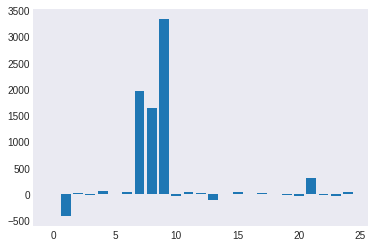

In [266]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

According to this the important features are:

Feature 10 (Supermarket Type 1), 
Feature 12 (Supermarket Type 3), 
Feature 25 (Seafood), 
Feature 34 (OUT027), 
Feature 35 (OUT035), 
Feature 37 (OUT046), 
Feature 38 (OUT049)

I'm not sure this makes a lot of sense. I would have though Item MRP would have had a significant effect on the predictions. I feel like I'm missing something with this step.

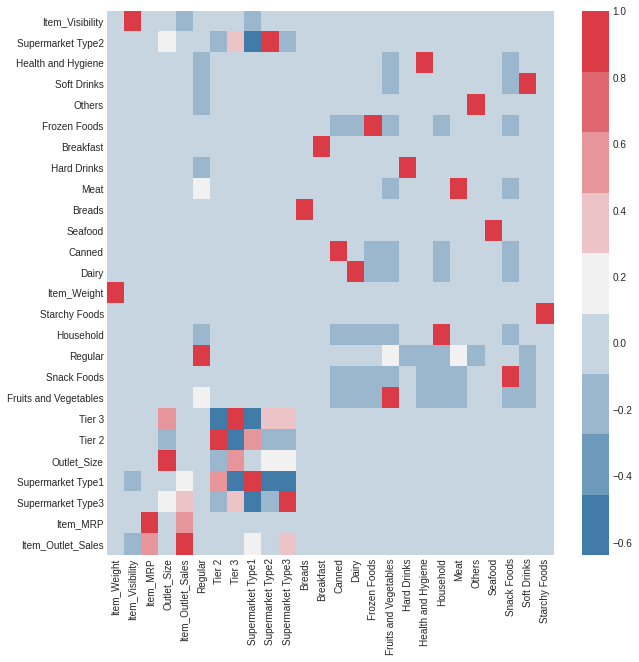

In [267]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr().sort_values(by = 'Item_Outlet_Sales'), cmap = sns.diverging_palette(240, 10, n=9));

This heatmap show a correlation between OUT027, Supermarket Type 3, and Item MRP with regards to Item Outlet Sales.

Testing with fewer features to see if R2 percentage is better.

In [268]:
X2 = df.loc[:, ['Item_MRP', 'Supermarket Type2', 'Supermarket Type3', 'Supermarket Type1', 'Others']]
X2.shape

(8523, 5)

In [298]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state = 42)

In [299]:
reg = LinearRegression()
reg.fit(X2_train,y_train);
train_preds = reg.predict(X2_train)
test_preds = reg.predict(X2_test)

In [302]:
print(r2_score(y_train, train_preds))
print(r2_score(y_test, test_preds))

0.5593373501054837
0.5690103425842085


In [301]:
print(np.sqrt(mean_squared_error(y_train, train_preds)))
print(np.sqrt(mean_squared_error(y_test, test_preds)))

1141.9814328622494
1090.4543438813657


R2 percentage decreased. RMSE still roughly same difference

Decision Tree and Forests, based off full features of sales_df

In [273]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train, y_train)
dt_train = dt.predict(X_train)
dt_pred = dt.predict(X_test)


bf = BaggingRegressor(random_state = 42)
bf.fit(X_train, y_train)
bf_train = bf.predict(X_train)
bf_pred = bf.predict(X_test)


rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)
rf_train = rf.predict(X_train)
rf_pred = rf.predict(X_test)

In [274]:
print('Decision Tree R2 Train', dt.score(X_train, y_train))
print('Decision Tree R2 Test', dt.score(X_test, y_test))

Decision Tree R2 Train 1.0
Decision Tree R2 Test 0.1589019157235314


In [275]:
print('Decision Tree RMSE Train', np.sqrt(mean_squared_error(y_train, dt_train)))
print('Decision Tree RMSE Test', np.sqrt(mean_squared_error(y_test, dt_pred)))

Decision Tree RMSE Train 9.851728209784172e-15
Decision Tree RMSE Test 1523.3418891819606


In [276]:
print('Bagged Forest R2 Train', bf.score(X_train, y_train))
print('Bagged Forest R2 Test', bf.score(X_test, y_test))

Bagged Forest R2 Train 0.917359240001055
Bagged Forest R2 Test 0.505894010622139


In [277]:
print('Bagged Forest RMSE Train', np.sqrt(mean_squared_error(y_train, bf_train)))
print('Bagged Forest RMSE Test', np.sqrt(mean_squared_error(y_test, bf_pred)))

Bagged Forest RMSE Train 494.54187750410813
Bagged Forest RMSE Test 1167.573210750724


In [278]:
print('Random Forest R2 Train', rf.score(X_train, y_train))
print('Random Forest R2 Test', rf.score(X_test, y_test))

Random Forest R2 Train 0.935714133386463
Random Forest R2 Test 0.5362021231086785


In [279]:
print('Random Forest RMSE Train', np.sqrt(mean_squared_error(y_train, rf_train)))
print('Random Forest RMSE Test', np.sqrt(mean_squared_error(y_test, rf_pred)))

Random Forest RMSE Train 436.1779163023563
Random Forest RMSE Test 1131.1975108159065


Needs parameter tuning

In [280]:
#Determine best depth for decision tree
max_depth_range = list(range(2, 34)) 

r2 = []
for depth in max_depth_range:
    dt = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    dt.fit(X_train, y_train)

    score = dt.score(X_test, y_test)
    
    r2.append(score)

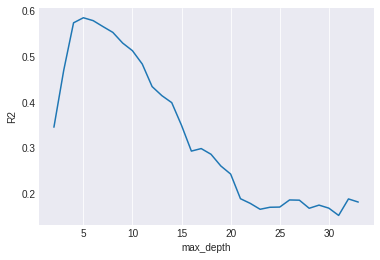

In [281]:
plt.plot(max_depth_range, r2)
plt.grid(axis = 'x')
plt.xlabel('max_depth')
plt.ylabel('R2');

In [282]:
dt2 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dt2.fit(X_train, y_train)
dt2_train = dt2.predict(X_train)
dt2_pred = dt2.predict(X_test)

In [283]:
print('Decision Tree R2 Train', dt2.score(X_train, y_train))
print('Decision Tree R2 Test', dt2.score(X_test, y_test))

Decision Tree R2 Train 0.612057803720431
Decision Tree R2 Test 0.5856983281382548


In [284]:
print('Decision Tree RMSE Train', np.sqrt(mean_squared_error(y_train, dt2_train)))
print('Decision Tree RMSE Test', np.sqrt(mean_squared_error(y_test, dt2_pred)))

Decision Tree RMSE Train 1071.4932318060307
Decision Tree RMSE Test 1069.1346514667273


Far better results with a max_depth of 5 on the Decision tree.

Lets see if we can do better on our Random Forests (better than bagged)

In [285]:
rf2 = RandomForestRegressor(max_depth = 5, random_state = 42)
rf2.fit(X_train, y_train)
rf2_train = rf2.predict(X_train)
rf2_pred = rf2.predict(X_test)

In [286]:
print('Random Forest R2 Train', rf2.score(X_train, y_train))
print('Random Forest R2 Test', rf2.score(X_test, y_test))

Random Forest R2 Train 0.6198505061130705
Random Forest R2 Test 0.6025120328984492


In [287]:
print('Random Forest RMSE Train', np.sqrt(mean_squared_error(y_train, rf2_train)))
print('Random Forest RMSE Test', np.sqrt(mean_squared_error(y_test, rf2_pred)))

Random Forest RMSE Train 1060.676948112175
Random Forest RMSE Test 1047.2154856616746


Both Decision Tree Model and Random Forest Model are more effective than the Linear Regression Model, with Random Forest just barely getting a better result than Decision Tree, both with a max depth of 5 as optimal parameters.

Now let's try with fewer features

In [288]:
dt.feature_importances_

array([0.04874568, 0.11124084, 0.4632856 , 0.01990578, 0.00672313,
       0.00944365, 0.00250002, 0.09517179, 0.06852022, 0.11049108,
       0.00455971, 0.00312665, 0.00497124, 0.00494142, 0.00437274,
       0.00880193, 0.00273555, 0.00216378, 0.00716299, 0.00252117,
       0.00191631, 0.00122566, 0.00858091, 0.00359804, 0.00329412])

In [304]:
dt_feature = pd.DataFrame({'Feature_Names': X.columns, 'Importance': dt.feature_importances_})
print(dt_feature.sort_values(by = 'Importance', ascending = False))

            Feature_Names  Importance
2                Item_MRP    0.463286
1         Item_Visibility    0.111241
9       Supermarket Type3    0.110491
7       Supermarket Type1    0.095172
8       Supermarket Type2    0.068520
0             Item_Weight    0.048746
3             Outlet_Size    0.019906
5                  Tier 2    0.009444
15  Fruits and Vegetables    0.008802
22            Snack Foods    0.008581
18              Household    0.007163
4                 Regular    0.006723
12                 Canned    0.004971
13                  Dairy    0.004941
10                 Breads    0.004560
14           Frozen Foods    0.004373
23            Soft Drinks    0.003598
24          Starchy Foods    0.003294
11              Breakfast    0.003127
16            Hard Drinks    0.002736
19                   Meat    0.002521
6                  Tier 3    0.002500
17     Health and Hygiene    0.002164
20                 Others    0.001916
21                Seafood    0.001226


Create a new X (X3) based on the top 6 features

In [305]:
X3 = df.loc[:, ['Item_MRP', 'Item_Visibility', 'Supermarket Type3', 'Supermarket Type2', 'Supermarket Type1', 'Item_Weight']]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, random_state = 42)

In [306]:
dt3 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dt3.fit(X3_train, y_train)
dt3_train = dt3.predict(X3_train)
dt3_pred = dt3.predict(X3_test)

rf3 = RandomForestRegressor(max_depth = 5, random_state = 42)
rf3.fit(X3_train, y_train)
rf3_train = rf3.predict(X3_train)
rf3_pred = rf3.predict(X3_test)

In [307]:
print('Decision Tree R2 Train', dt3.score(X3_train, y_train))
print('Decision Tree R2 Test', dt3.score(X3_test, y_test))

Decision Tree R2 Train 0.6116720403338863
Decision Tree R2 Test 0.5889542653489792


In [308]:
print('Decision Tree RMSE Train', np.sqrt(mean_squared_error(y_train, dt3_train)))
print('Decision Tree RMSE Test', np.sqrt(mean_squared_error(y_test, dt3_pred)))

Decision Tree RMSE Train 1072.0258371238258
Decision Tree RMSE Test 1064.925277262197


In [309]:
print('Random Forest R2 Train', rf3.score(X3_train, y_train))
print('Random Forest R2 Test', rf3.score(X3_test, y_test))

Random Forest R2 Train 0.6193858633391127
Random Forest R2 Test 0.6015305648209827


In [310]:
print('Random Forest RMSE Train', np.sqrt(mean_squared_error(y_train, rf3_train)))
print('Random Forest RMSE Test', np.sqrt(mean_squared_error(y_test, rf3_pred)))

Random Forest RMSE Train 1061.324963413428
Random Forest RMSE Test 1048.507568663219


Changing the number of features didn't really seem to alter the results, maybe reduced their effectiveness slightly, but not enough to make a big difference in this instance.

In my opinion, based on my current knowledge level, the best model choice for predicting Item_Outlet_Sales is the Random Forest Regressor with a max_depth of 5.